In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint

In [2]:
sp = pd.read_csv('sp500_stock.csv')
dta = pd.read_csv('broader_stock.csv')

In [3]:
def data_preprocess(dta):
    dta['Date'] = pd.to_datetime(dta['Date'], format='%Y-%m-%d')
    dta = dta.set_index(dta['Date'])
    # NHLI not traded
    dta.drop(['Date', 'NHLI'], axis=1, inplace=True)
    dta.dropna(how='all', inplace=True)
    for tick in dta.columns:
        tick_series = dta[tick]
        start_pos = tick_series.first_valid_index()
        valid_series = tick_series.loc[start_pos:]
        if valid_series.isna().sum() > 0:
            dta.drop(tick, axis=1, inplace=True)

    for tick in dta.columns:
        dta[tick] = dta[tick].mask(dta[tick] == 0).ffill(downcast='infer')

    return dta[dta.index >= dta['SPY'].first_valid_index()]

In [4]:
sp = data_preprocess(sp)
dta = data_preprocess(dta)

In [5]:
dta.columns

Index(['AME', 'NOW', 'XYL', 'BAC', 'TGI', 'AMBC', 'NSP', 'MOS', 'MEI', 'PSB',
       ...
       'DY', 'VECO', 'AIV', 'LNN', 'TDY', 'BBBY', 'K', 'BEN', 'THRM', 'PAYX'],
      dtype='object', length=1302)

In [21]:
tick = 'AME'

test = dta[tick]

In [10]:
if tick in sp.columns:
    temp = pd.concat([sp.drop([tick], axis=1), test], axis=1).dropna(axis=1)
    temp['%s_LAG' % tick] = temp[tick].shift(-120)
    temp.dropna(inplace=True)

    y = temp['%s_LAG' % tick]
    cointegrat = {}
    correlat = {}

    for i in temp.columns[:-2]:
        x = temp[i]
        score, pval, _ = coint(x, y, trend='ct')
        corr = x.corr(y)

        cointegrat[i] = pval
        correlat[i] = corr

    best_coint = sorted(cointegrat, key=cointegrat.get)[:10]
    best_corr = sorted(correlat, key=correlat.get, reverse=True)[:10]

    intersect = list(set(best_coint) & set(best_corr))



In [43]:
temp['AME_LAG'] = temp['AME'].shift(-3)

In [44]:
temp.dropna(inplace=True)

In [45]:
temp

,NKE,DDS,IPG,LLY,MTG,WY,CI,AON,CCEP,CSCO,...,R,NSC,VAL,EMR,TEX,XOM,TER,SPY,AME,AME_LAG
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.14,40.53,6.28,4.03,11.21,17.35,3.42,7.04,1.37,0.94,...,13.17,8.34,7.9348,3.62,4.37,3.41,3.41,26.18,0.71,0.71
1993-02-01,0.14,40.01,6.33,3.99,11.48,17.56,3.55,7.18,1.37,0.96,...,13.11,8.57,7.5570,3.62,4.55,3.43,3.26,26.37,0.71,0.71
1993-02-02,0.14,40.43,6.09,3.94,11.59,17.62,3.54,7.25,1.36,0.98,...,13.44,8.59,7.9348,3.59,4.66,3.47,3.24,26.43,0.71,0.70
1993-02-03,0.14,42.19,6.37,4.02,11.72,17.56,3.66,7.33,1.37,0.97,...,13.65,8.74,7.9348,3.67,4.61,3.49,3.44,26.71,0.71,0.70
1993-02-04,0.15,42.19,6.37,4.01,11.95,17.83,3.73,7.63,1.37,0.97,...,13.98,8.86,7.5570,3.76,4.78,3.63,3.50,26.82,0.71,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-05,100.94,26.52,18.69,153.59,8.40,28.35,174.87,198.53,40.47,47.33,...,36.23,192.12,0.4300,64.24,19.73,43.00,90.65,332.11,96.42,99.04
2020-08-06,100.45,26.16,18.53,152.14,8.30,28.01,173.07,195.61,40.61,47.77,...,35.52,195.77,0.4000,64.67,19.20,42.80,90.86,334.33,97.52,99.25
2020-08-07,101.86,27.86,18.41,152.19,8.54,28.35,178.19,195.44,41.43,47.43,...,36.93,198.99,0.4000,65.91,19.65,42.60,87.57,334.57,97.79,101.23


In [13]:
temp.columns[:-2]

Index(['NKE', 'DDS', 'IPG', 'LLY', 'MTG', 'WY', 'CI', 'AON', 'CCEP', 'CSCO',
       ...
       'BEN', 'NUE', 'FISV', 'R', 'NSC', 'VAL', 'EMR', 'TEX', 'XOM', 'TER'],
      dtype='object', length=308)

In [14]:
intersect

['APH', 'UNP', 'OKE', 'PH']

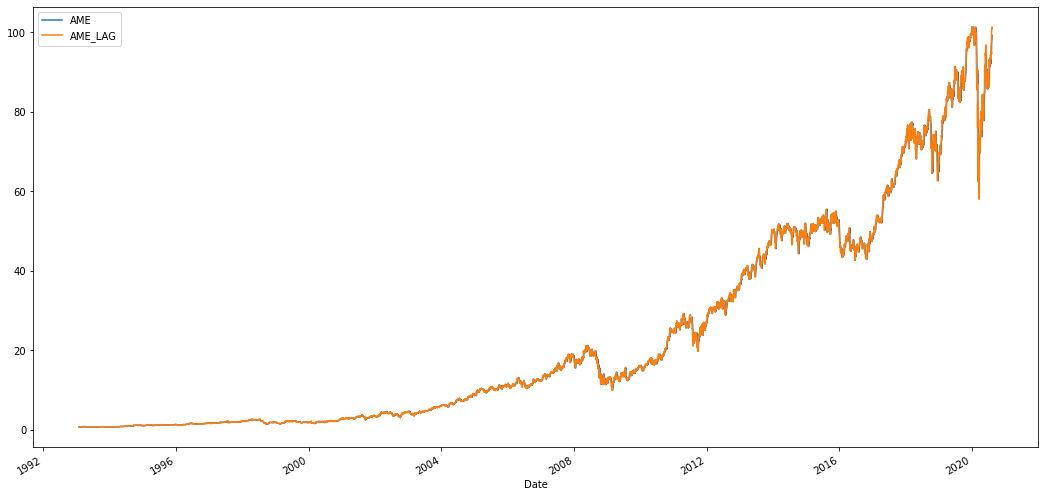

In [46]:
plt.figure(figsize=(18,9))
temp['AME'].plot()
temp['AME_LAG'].plot()
plt.legend(['AME', 'AME_LAG'])

In [47]:
X = temp[['AME']]
Y = temp['AME_LAG']

In [48]:
mod = sm.OLS(Y, sm.add_constant(X)).fit()

In [49]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AME_LAG   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.387e+06
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:44:31   Log-Likelihood:                -9367.0
No. Observations:                6934   AIC:                         1.874e+04
Df Residuals:                    6932   BIC:                         1.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0171      0.015      1.140      0.254      -0.012       0.047
AME            1.0011      0.000   2320.909      0.000       1.000       1.002
==============================================================================
Omnibus:                     3666.557   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           558433.890
Skew:                          -1.490   Prob(JB):                         0.00
Kurtosis:                      46.863   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
mod.fittedvalues

Date
1993-01-29      1.108775
1993-02-01      1.125282
1993-02-02      1.131842
1993-02-03      1.141765
1993-02-04      1.144506
                 ...    
2020-02-19    103.040650
2020-02-20    103.893945
2020-02-21    103.275275
2020-02-24     99.351880
2020-02-25     96.113091
Length: 6817, dtype: float64

In [40]:
y_pred = mod.predict()

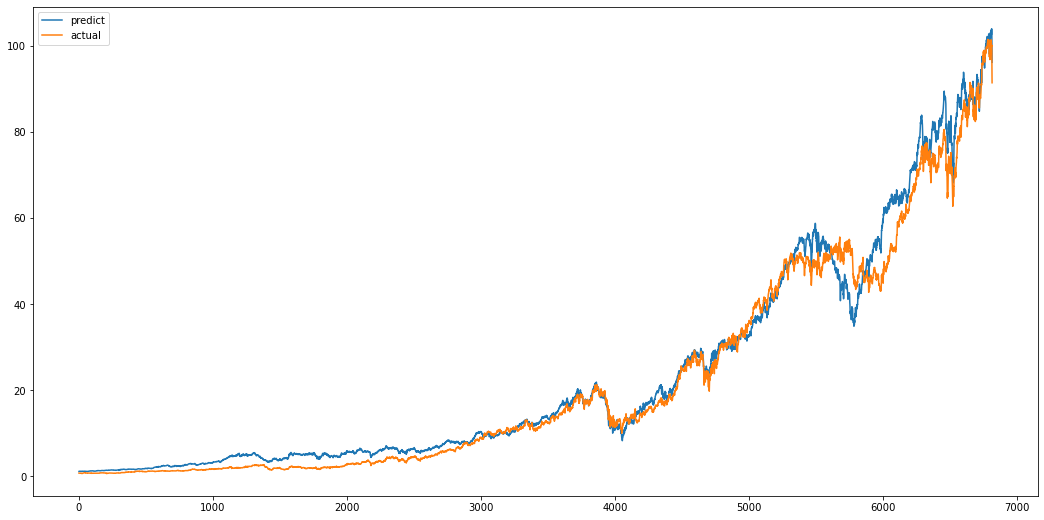

In [44]:
plt.figure(figsize=(18,9))
plt.plot(y_pred)
plt.plot(temp['AME'].values)
plt.legend(['predict', 'actual'])


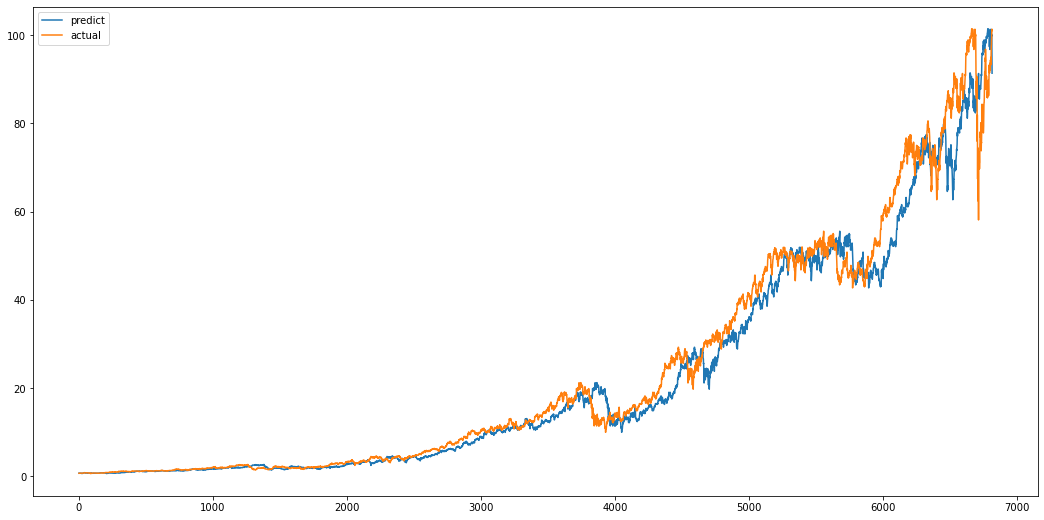

In [63]:
plt.figure(figsize=(18,9))
plt.plot(temp['AME'].values)
plt.plot(temp['AME_LAG'].values)
plt.legend(['predict', 'actual'])


In [78]:
inventory = 0
asset = 0
record = [0]
forecast_diff = y_pred

for t in range(len(forecast_diff)):
    trend_good = forecast_diff[t] > temp['AME'].iloc[t]
    price = temp['AME'].iloc[t]
    if trend_good and inventory == 0:
        # buy
        asset -= price
        inventory += 1
    elif not trend_good and inventory == 1:
        # sell
        asset += price
        inventory -= 1
    elif t == len(forecast_diff) - 1 and inventory == 1:
        asset += price
        inventory -= 1
    else:
        asset = record[-1]
    record.append(asset)



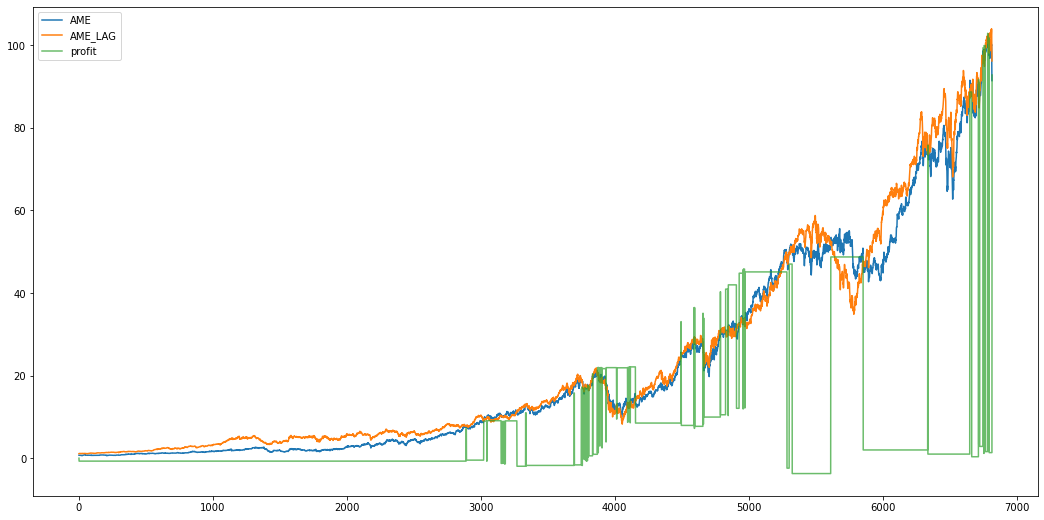

In [79]:
plt.figure(figsize=(18,9))
plt.plot(temp['AME'].values)
plt.plot(y_pred)
plt.plot(record, alpha=0.7)
plt.legend(['AME', 'AME_LAG', 'profit'])



In [80]:
asset

92.70999999999997